In [1]:
from toweb import Space,Color
from scipy.spatial import Delaunay
from numpy import array,vstack
s=Space()
vertices=array([[0.5,0.5,0.5],
            [-0.5,0.5,0.5],
            [0.5,-0.5,0.5],
            [-0.5,-0.5,0.5],
            [0.5,0.5,-0.5],
            [-0.5,0.5,-0.5],
            [0.5,-0.5,-0.5],
            [-0.5,-0.5,-0.5]])
tri_z=Delaunay(vertices[:,[0,1]])
tri_y=Delaunay(vertices[:,[0,2]])
tri_x=Delaunay(vertices[:,[1,2]])
tri_vertices=vertices[vstack((tri_x.simplices,tri_y.simplices,tri_z.simplices))].flatten().tolist()
s.render_mesh(tri_vertices,Color.Rand())

click http://localhost:8001/view/1f4e9852-24db-11ec-9517-ef08a8134dc5 to view in browser


In [2]:
from py3d import Vector3
from toweb import Space,Color
s=Space("s")
s.render_mesh([1,0,0,0,0,1,0,1,0],Color.Rand())

click http://localhost:8001/view/s to view in browser


In [3]:
import numpy as np
u = np.array([0,0,0.5,1,1]) 
v = np.array([0,1,0.5,0,1]) 
np.array([u,v])

array([[0. , 0. , 0.5, 1. , 1. ],
       [0. , 1. , 0.5, 0. , 1. ]])

area:  34.64101615137756
volume:  17.453559924999308


<ipython-input-4-4c06322c5873>:49: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  face.set_color(mpl.colors.rgb2hex(sp.rand(3)))


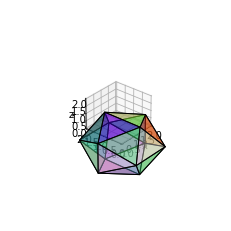

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
import numpy as np
import scipy as sp
from scipy import spatial as sp_spatial


def icosahedron():
    h = 0.5*(1+np.sqrt(5))
    p1 = np.array([[0, 1, h], [0, 1, -h], [0, -1, h], [0, -1, -h]])
    p2 = p1[:, [1, 2, 0]]
    p3 = p1[:, [2, 0, 1]]
    return np.vstack((p1, p2, p3))


def cube():
    points = np.array([
        [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
        [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1],
    ])
    return points


points = icosahedron()
# points = cube()

hull = sp_spatial.ConvexHull(points)
indices = hull.simplices
faces = points[indices]

print('area: ', hull.area)
print('volume: ', hull.volume)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.dist = 30
ax.azim = -140
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for f in faces:
    face = a3.art3d.Poly3DCollection([f])
    face.set_color(mpl.colors.rgb2hex(sp.rand(3)))
    face.set_edgecolor('k')
    face.set_alpha(0.5)
    ax.add_collection3d(face)

plt.show()